In [479]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline

In [480]:
data1 = pd.read_csv('ex1data1.txt', names=['Population', 'Profit'])
data1.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


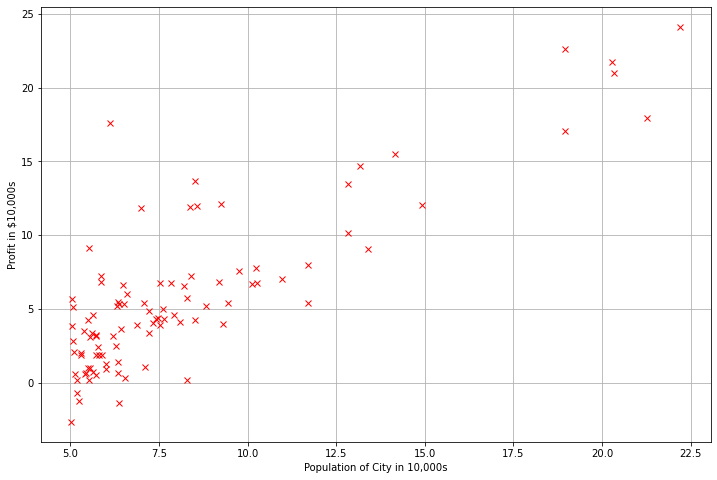

In [481]:
plt.figure(figsize=(12, 8))
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.grid()
plt.plot(data1.Population, data1.Profit, 'rx')

In [482]:
# Get the number of features.
n = len(data1.columns)-1 # subtract the target column

# Create a function to pepare the data.
def prepareData(data, n):
    """
    Add 1s column, convert to matrices,
    initialize theta.
    Args:
        data: read the data file
        n: int
    Return:
        x: a m by n+1 matrix
        y: a m by 1 vector
        theta: a n+1 by 1 vector
    """
    # Add a column with 1s in the data set.
    data.insert(0, 'Ones', 1)

    # Define X and y, separating the data set.
    x = data.iloc[:, 0:n+1]
    y = data.iloc[:, n+1:n+2]

    # Convert to matrices and initialize parameters theta to 0s.
    # Theta is a vector [n + 1 x 1] and Theta Transpose is a vector [1 x n+1],
    # where n is the number of features.
    x = np.matrix(x.values)
    y = np.matrix(y.values)
    theta = np.matrix(np.zeros((n+1, 1)))
    return x, y, theta

x, y, theta = prepareData(data1, n)

In [483]:
# Initialize parameters for iterations and learning rate α.
iterations = 1500
alpha = 0.01

# Check the dimensions of the matrices.
x.shape, y.shape, theta.shape

((97, 2), (97, 1), (2, 1))

In [484]:
# Create a function to compute cost.
def computeCost(x, y, theta):
    """
    Compute the cost function.
    Args:
        x: a m by n+1 matrix
        y: a m by 1 vector
        theta: a n+1 by 1 vector
    Returns:
        cost: float
    """
    m = len(x)
    cost = np.sum(np.square((x * theta) - y)) / (2 * m)
    return cost

computeCost(x, y, theta)

32.072733877455676

In [485]:
# Create a function to implement gradient descent.
def gradientDescent(x, theta, iterations):
    """
    Implement gradient descent.
    Args:
        x: a m by n+1 matrix
        theta: a n+1 by 1 vector
    Return:
        theta: a n+1 by 1 vector
        J_vals: a #iterations by 1 vector
    """
    m = len(x)
    J_vals = []
    
    for i in range(iterations):
        error = (x * theta) - y
        for j in range(len(theta.flat)):
            theta.T[0, j] = theta.T[0, j] - (alpha/m) * np.sum(np.multiply(error, x[:, j]))
        J_vals.append(computeCost(x, y, theta))
    return (theta, J_vals)

theta, J_vals = gradientDescent(x, theta, iterations)

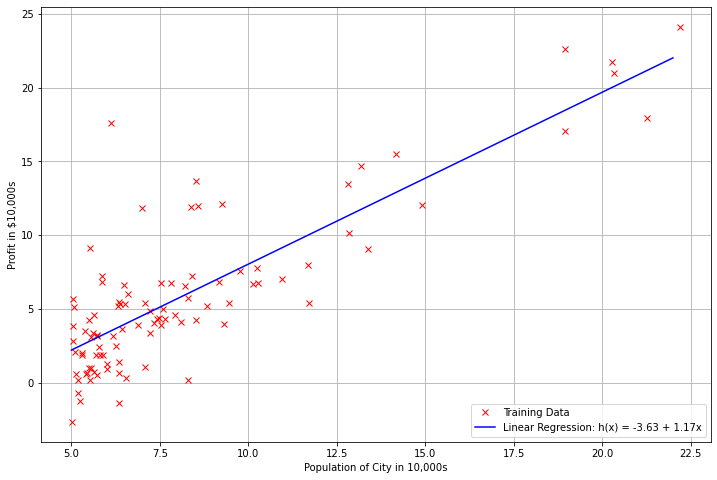

In [486]:
theta_f = list(theta.flat)
xs = np.arange(5, 23)
ys = theta_f[0] + theta_f[1] * xs

plt.figure(figsize=(12, 8))
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.grid()
plt.plot(data1.Population, data1.Profit, 'rx', label='Training Data')
plt.plot(xs, ys, 'b-', label='Linear Regression: h(x) = %0.2f + %0.2fx'%(theta[0], theta[1]))
plt.legend(loc=4)

In [487]:
# Predict the profit for population of 35000 and 70000.
print((theta_f[0] + theta_f[1] * 3.5) * 10000)
print((theta_f[0] + theta_f[1] * 7) * 10000)

4519.767867701763
45342.450129447134


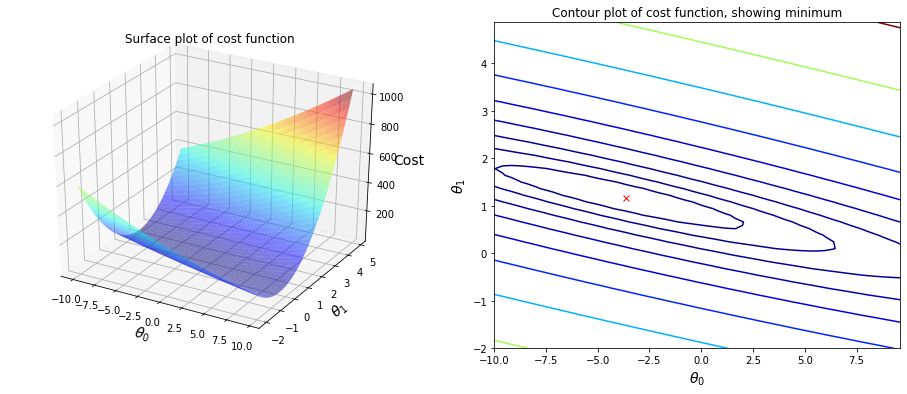

In [488]:
from mpl_toolkits.mplot3d import axes3d

# Create meshgrid.
xs = np.arange(-10, 10, 0.4)
ys = np.arange(-2, 5, 0.14)
xx, yy = np.meshgrid(xs, ys)

# Initialize J values to a matrix of 0's.
J_vals = np.zeros((xs.size, ys.size))

# Fill out J values.
for index, v in np.ndenumerate(J_vals):
    J_vals[index] = computeCost(x, y, [[xx[index]], [yy[index]]])

# Create a set of subplots.
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)

# Create surface plot.
ax1.plot_surface(xx, yy, J_vals, alpha=0.5, cmap='jet')
ax1.set_zlabel('Cost', fontsize=14)
ax1.set_title('Surface plot of cost function')

# Create contour plot.
ax2.contour(xx, yy, J_vals, np.logspace(-2, 3, 20), cmap='jet')
ax2.plot(theta_f[0], theta_f[1], 'rx')
ax2.set_title('Contour plot of cost function, showing minimum')

# Create labels for both plots.
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=14)
    ax.set_ylabel(r'$\theta_1$', fontsize=14)

In [489]:
data2 = pd.read_csv('ex1data2.txt', names=['Size', 'Bedrooms', 'Price'])
data2.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [490]:
# Normalize features, but NOT target price!
data2.iloc[:, 0:2] = data2.iloc[:, 0:2].apply(lambda x: (x - np.mean(x)) / np.std(x))
data2.describe()

,Size,Bedrooms,Price
count,4.700000e+01,4.700000e+01,47.000000
mean,-9.448707e-18,2.480285e-16,340412.659574
std,1.010811e+00,1.010811e+00,125039.899586
min,-1.461049e+00,-2.882690e+00,169900.000000
25%,-7.233261e-01,-2.260934e-01,249900.000000
50%,-1.433229e-01,-2.260934e-01,299900.000000
75%,3.412850e-01,1.102205e+00,384450.000000
max,3.150993e+00,2.430504e+00,699900.000000


In [491]:
n = len(data2.columns)-1
x, y, theta = prepareData(data2, n)

In [492]:
# Initialize learning rate α.
alpha = 0.15

# Check the dimensions of the matrices.
x.shape, y.shape, theta.shape

((47, 3), (47, 1), (3, 1))

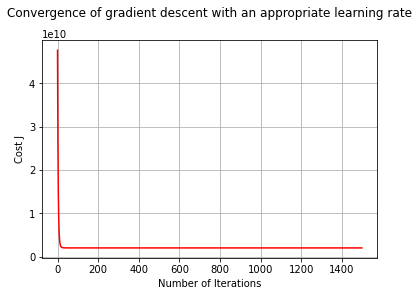

In [493]:
iterations = 1500
theta, J_vals = gradientDescent(x, theta, iterations)

plt.xlabel('Number of Iterations')
plt.ylabel('Cost J')
plt.title('Convergence of gradient descent with an appropriate learning rate', y=1.08)
plt.grid()
plt.plot(range(iterations), J_vals, 'r')

In [494]:
# Predict the price for a 1650-square-foot house with 3 bedrooms.
# First normalize features using the std and mean values.
size = (1650 - 2000.680851) / 794.702354
bedrooms = (3 - 3.170213) / 0.760982
theta_f = list(theta.flat)
theta_f1 = theta_f
print('Price: $', (theta_f[0] + theta_f[1] * size + theta_f[2] * bedrooms))

Price: $ 293587.6967229603


In [495]:
from numpy.linalg import inv

data2 = pd.read_csv('ex1data2.txt', names=['Size', 'Bedrooms', 'Price'])
n = len(data2.columns)-1
x, y, theta = prepareData(data2, n)

# Create the normal equation.
def normalEquation(x, y):
    """
    Get the analytical solution to linear regression,
    using the normal equation.
    Args:
        x: a m by n+1 matrix
        y: a m by 1 vector
    Return:
        theta: a n+1 by 1 vector
    """
    theta = np.dot(np.dot(inv(np.dot(x.T, x)), x.T), y)
    return theta

theta = normalEquation(x, y)

In [496]:
# No need to normalize the features now!
theta_f = list(theta.flat)
print('Price: $', (theta_f[0] + theta_f[1] * 1650 + theta_f[2] * 3))

Price: $ 293081.46433489426


In [497]:
sumofsquares = 0
sumofresiduals = 0
score = 0

# y_hat = [predict(x_i,min_theta_2) for x_i in X1.T]

Y = y
Y1 = (Y - np.mean(Y,axis=0))/np.std(Y,axis=0)

y_mean = np.mean(Y1)
min_theta_2 = np.array(theta_f1)

# for i in X1.T:
#     y_pred = predict(x_i,min_theta_2)
#     sumofsquares += (Y[])
# for x_i in X1.T:
#     print(x_i)
# X12 = X1.T
# y_pred = X1.T.dot(min_theta_2)
for i in range(len(Y)):
#     X_pred = np.array(X_predict[i])
#     y_pred = X1.T.dot(min_theta_2)
    y_pred = theta_f1[0] + theta_f1[1] * size + theta_f1[2] * bedrooms
#     print(y_pred)
#     y_pred = Theta[0] + Theta[1]*X_bias
    sumofsquares += (Y[i] - y_mean) ** 2
    sumofresiduals += (Y[i] - y_pred) ** 2
#     score += 1 - np.mean(sumofresiduals/sumofsquares)
#     print(score[0])
    
score = 1 - (sumofresiduals/sumofsquares)
# print(np.abs(np.mean(score)))
# print(np.mean(score))
# print(np.mean(score))
print(score)



[[0.86663758]]
